# Homework 2 (HW2)

---
By the end of this homework we expect you to be able to:
1. Preprocess data and make it amenable to statistical analysis and machine learning models;
2. Train and test out-of-the-box machine learning models in Python;
3. Carry out statistical hypothesis testing;
4. Carry out simple multivariate regression analyses;
5. Use techniques to control for covariates;
---

## Important Dates

- Homework release: Fri 6 Nov 2020
- **Homework due**: Fri 20 Nov 2020, 23:59
- Grade release: Mon 30 Nov 2020

---

##  Some rules

1. You are allowed to use any built-in Python library that comes with Anaconda. If you want to use an external library, you have to justify your choice.
2. Make sure you use the data folder provided in the repository in **read-only** mode.
3. Be sure to provide a textual description of your thought process, the assumptions you made, the solution you implemented, and explanations for your answers. A notebook that only has code cells will not suffice.
4. For questions containing the **/Discuss:/** prefix, answer not with code, but with a textual explanation (in markdown).
5. Back up any hypotheses and claims with data, since this is an important aspect of the course.
6. Please write all your comments in English, and use meaningful variable names in your code. Your repo should have a single notebook (plus the required data files) in the master branch. If there are multiple notebooks present, we will **strictly** not grade anything.
7. Also, be sure to hand in a fully-run and evaluated notebook. We will not run your notebook for you, we will grade it as is, which means that only the results contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells. In order to check whether everything looks as intended, you can check the rendered notebook on the GitHub website once you have pushed your solution there.
8. Make sure to print results or dataframes that confirm you have properly addressed the task.
9. Lastly, the grading is done in the *double blind* mode, i.e., the TAs grades an anonymized version of your notebook, so make sure that your notebook **neither has your team name nor the names of the members**.

## Context

Publishing papers is a big part of the lives of [Ph.D. students](http://phdcomics.com/comics/archive.php?comicid=154), [post-docs](http://phdcomics.com/comics/archive.php?comicid=1744) and [professors](http://phdcomics.com/comics/archive.php?comicid=1051). 
In Computer Science, publishing happens mostly in conferences. What follows is a slight simplification of how these conferences decide which papers to accept and which papers to reject.
 
Every year, scholars submit papers to prestigious conferences. The papers are then assigned to reviewers (usually around 3), who are other people from the same research community (respect thy neighbor!). Each reviewer weighs in on whether they believe the papers they were assigned are good or bad, and write a review, often along with a score (e.g. +3 Strong Accept, +2 Accept, +1 Weak Accept, 0 Borderline, …,  -3 Strong Reject). Then, in the end, "special" reviewers called, "Area Chairs" analyze all the reviews that were written for the same paper and decide what gets accepted and what gets rejected. Importantly, throughout this whole dance, reviewers and authors are anonymous. When you're reviewing a paper, you do not know who wrote it. And when you receive the review, you don't know who reviewed it. Because of that, we call this a double-blind reviewing process.

An interesting development that has evolved in recent years is the rise of pre-prints. In previous times, researchers often exposed their research to the world only after it had been peer-reviewed and published in a conference or a journal. But recently researchers are much keener to let their ideas out into the world as soon as possible, and they publish their research before it has been approved to any conference or journal, by posting the research on so-called pre-print servers. The most common pre-print server for Computer Science, Physics, and Maths is called [arXiv](https://arxiv.org/), for Biology, an increasingly popular one is [bioRxiv](https://www.biorxiv.org/), for Psychology [psyArXiv](https://psyarxiv.com/) (they are not very creative with the names). Notice that pre-prints and peer-review are not mutually exclusive, in fact, usually, you publish your pre-print, and then you try to publish your work in a peer-reviewed setting.

Overall, publishing pre-prints has many benefits. They make science more accessible and hasten the circulation of important results in the academic community. However, a big issue brought forth with pre-prints is that they often break the anonymity in the double-blind reviewing process. For instance, in machine learning, since most papers are published as pre-prints, it is often easy to figure out if the paper you are reviewing is from a famous researcher or a big company with prominent research scientists. From critics' viewpoint, knowing the authors of the papers you are reviewing can bias your reviews. If you know that a given author is famous, you'd be more inclined to take his or her word for granted. If the author is from an institution you’ve never heard about, you are more likely to doubt his or her findings.

In this homework, we will take a data-driven deep dive into the world of academic publishing. Can you use your freshly acquired data-science skills to predict which papers are going to make the cut? Are your data analysis skills sharp enough to figure out whether the aforementioned concerns about pre-print issues are justified?


## The data

The data, whose source has been *"double-blinded"* from you, and which has been simplified a bit for the assignment, contains information about submissions to a prestigious machine learning conference called ICLR (pronounced “I-clear”). You can find the dataframe in the git repo for the homework (`./data/dataset_final.csv`). We provide a brief description of the fields you will encounter.

- `year`: year the paper has been submitted to ICLR. Notice that we provide data for three years, 2018, 2019, and 2020.


- `paper`: title of the paper.


- `authors`: names of the authors separated by ;.


- `ratings`: mean rating given to the paper by the reviewers.


- `decisions`: either Accept if the paper was accepted, or Reject otherwise.


- `institution`: institutions for each of the authors, separated by ;.


- `csranking`: ranking of the institutions according to csrankings. The better the institution, the better the rank. Notice that, if a paper has more than 1 author, this field will contain multiple values, separated by ;. For institutions that are not in csrankings, the value will be -1.


- `categories`: topical categories of the paper. Each number corresponds to a different category: (1) Theory, (2) Computer Vision, (3) Natural Language Processing, (4) Adversarial ML, (5) Generative Modeling, (7) Fairness, (8) Generalization, (9) Optimization, (10) Graphs, (11) Bayesian Methods, (0) Others. A paper may belong to multiple categories, separated by ;.


- `authors_citations`: number of citations of each one of the authors, separated by ;.


- `authors_publications`: number of publications by each one of the authors, separated by ;.


- `authors_hindex`: h-index of each one of the authors, separated by ;. The h-index is an author-level metric that measures both the productivity and citation impact of the publications of a scientist or scholar. It is the maximum value $h$ such that the given author has published $h$ papers that have each been cited at least $h$ times.


- `arxiv`: whether the paper was spotted in a pre-print server around the submission period.

Also, notice that in this dataframe, when some piece of data was not available, -1 will be used as the value. For example, companies aren't a part of csrankings, so for people who work in big companies, the values are -1 in the field csranking.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection, linear_model, metrics, ensemble
import statsmodels.api as sm
import networkx as nx
from networkx.algorithms import bipartite
import seaborn as sns
sns.set_theme();
import scipy
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

#### Loading the data

In [2]:
DATA_PATH = './data/dataset_final.csv'
df = pd.read_csv(DATA_PATH)

In [3]:
df.describe()

,year,ratings
count,4256.000000,4256.000000
mean,2019.291353,4.963381
std,0.766931,1.492028
min,2018.000000,1.000000
25%,2019.000000,4.000000
50%,2019.000000,5.000000
75%,2020.000000,6.000000
max,2020.000000,9.000000


## _Step 1:_ Predicting paper ratings

The first part of this homework poses a simple question: Can you predict the ratings the paper will receive given attributes related to its authors? To answer this question, we will build an ML pipeline from scratch, preprocessing the data, training a regression model, and then evaluating it.


---

### Task 1.1

Some of the fields in the data are not very amenable to serve as input to traditional machine learning algorithms. Namely, we have some fields for which there are a varying number of values (e.g. papers with 3 authors will have 3 values in the `author_citations` field, papers with 5 authors will have 5).


Your first task is to perform some feature engineering and derive unique values for each paper which you will be able to use in your ML model. 
More specifically, you must:

1. Create 3 new fields in the dataframe corresponding to the median value of the number of citations per author, the number of publications per author, and the h-index per author. So for instance, for the row `authors_publications`, you will create an additional column, e.g. `authors_publications_median`, containing the median number of publications per author in each paper.
2. Create another field entitled `reputation` capturing how famous the last author of the paper is. Notice that the last author of the paper is usually the most senior person involved in the project. This field should equal $\log_{10}\Big(\frac{\#citations}{\#publications} + 1\Big)$. Notice that each author in the dataset has at least 1 publication, so you don't risk dividing by 0.
3. Create two fields called `has_top_company` and `has_top_institution`. The field `has_top_company` equals 1 if the article contains an author in the following list of companies `["Facebook", "Google", "Microsoft", "Deepmind"]`, and 0 otherwise. The field `has_top_institution` equals 1 if the article contains an author in the top 10 institutions according to CSRankings.
4. **Discuss:** How did you handle -1 values in item 1.1.1? Justify your approach.

---

#### **1.1.1**

In [4]:
# string to list of the following columns

df['authors_citations'] = df['authors_citations'].str.split(';').apply(lambda x: list(map(int,x)))
df['authors_publications'] = df['authors_publications'].str.split(';').apply(lambda x: list(map(int,x)))
df['authors_hindex'] = df['authors_hindex'].str.split(';').apply(lambda x: list(map(int,x)))

In [5]:
# study on -1 values

print(f"Number -1 in authors_citations: {sum(df['authors_citations'].apply(lambda x: -1 in x))}")
print(f"Number -1 in authors_publications: {sum(df['authors_publications'].apply(lambda x: -1 in x))}")
print(f"Number -1 in authors_hindex: {sum(df['authors_hindex'].apply(lambda x: -1 in x))}")

Number -1 in authors_citations: 96
Number -1 in authors_publications: 96
Number -1 in authors_hindex: 96


In [6]:
# additional column with the median

df['authors_citations_median'] = df['authors_citations'].apply(lambda x: np.median(x))
df['authors_publications_median'] = df['authors_publications'].apply(lambda x: np.median(x))
df['authors_hindex_median'] = df['authors_hindex'].apply(lambda x: np.median(x))

#### **1.1.2**

In [7]:
# new column reputation capturing how famous the last author of the paper is

df['reputation'] = df.apply(lambda x: np.log10(x['authors_citations'][-1] / x['authors_publications'][-1] + 1), axis = 1)

#### **1.1.3**

In [8]:
# two new column 'has_top_company' if the article contains an author in TOP_COMPAGNY

TOP_COMPANY = '|'.join(["Facebook", "Google", "Microsoft", "Deepmind"])
df['has_top_company'] = df['institution'].str.contains(TOP_COMPANY).astype(int)

# 'has_top_institution' if the article contains an author in the top 10 institutions
#  according to CSRankings.

df['csranking'] = df['csranking'].str.split(';').apply(lambda x: list(map(int,x)))

def is_inbetween(x, min_ = 0, max_ = 10):
    'Return true if values is inbetween 0 and 10, otherwise false'
    
    if (x >= min_) & (x <= 10):
        return True
    else:
        return False

df['has_top_institution'] = df['csranking'].apply(lambda x: any([is_inbetween(i) for i in x])).astype(int)

Note that to have better result we could do a data standardization, where we subtract the mean from the features and divide them by the standard deviation. However, this is not ask in this exercice , so we will use unstandardize feature for the following question.

#### **1.1.4**
#### **Discussion :** 
**How did you handle -1 values in item 1.1.1? Justify your approach.**

The normal options to deal with null values (-1) are to drop these values or to impute something for the value. In 1.1.1 we are creating new features that takes the median of a group of values, with some of these values being null. Having a null value for these scores means that we could not find available data. In this case I think it is ok to leave the -1 as in and to pull the median value of the group down should there be a null value. There is only 1 paper whose medians are actually -1 which means they are the only group with a majority of nulls. We are penalizing papers with null values by leaving them -1.

In [9]:
# Team with a -1 value

df[df['authors_hindex_median'] == -1]

,year,paper,authors,ratings,decisions,institution,csranking,categories,authors_citations,authors_publications,authors_hindex,arxiv,authors_citations_median,authors_publications_median,authors_hindex_median,reputation,has_top_company,has_top_institution
4238,2020,CNAS: Channel-Level Neural Architecture Search,Heechul Lim;Min-Soo Kim;Jinjun Xiong,2.5,Reject,Gwangju Institute of Science and Technology;Gw...,"[-1, -1, -1]",0,"[-1, -1, 1775]","[-1, -1, 171]","[-1, -1, 23]",False,-1.0,-1.0,-1.0,1.056147,0,0


In [10]:
# we are dropping this one paper
df = df[df['authors_hindex_median'] != -1]

### Task 1.2

Now that you have cleaned up your data, your next task is to divide your data into a training set and a testing set. You should do this in two ways:

1. First, do it randomly. Split the data into a training set (70%) and a testing set (30%). We refer to these as "random split" in the subsequent tasks.
2. Second, do it longitudinally. Use the data from 2018 and 2019 for the training set, and the data from 2020 as the testing set. We refer to these as "longitudinal split" in the subsequent tasks.


#### **1.2.1**

In [11]:
def split_data_randomly(X,y,test_size,random_state = 1):
    '''
    Input: features dataset X , predict feature y , size of the test df test_size
    Output: respectively X and y  are splitting randomly btw train and test dataset
    '''
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,test_size = test_size, random_state = random_state)
    return X_train, X_test, y_train, y_test

#### **1.2.2**

In [12]:
def split_data_longitudinally(X,y,predict_feature):
    '''
    Input: features dataset X , predict feature y 
    Output: X_ltrain,y_ltrain made using 2018,2019 X_ltest,y_ltest made from 2020 dataset
    '''
    X_ltrain = df[df['year'] <= 2019].drop(predict_feature, axis = 1)
    y_ltrain = df[df['year'] <= 2019][predict_feature]
    
    X_ltest = df[df['year'] == 2020].drop(predict_feature, axis = 1)
    y_ltest = df[df['year'] == 2020][predict_feature]


    return X_ltrain, X_ltest, y_ltrain, y_ltest

### Task 1.3

Build a Linear Regression model (use [sklearn](https://scikit-learn.org/stable/)) that predicts the score of a paper (which is in the variable ratings in the dataframe). Train it and test it using the split you previously defined. Your model should use as features:
- Median values for the number of author citations, publications and h-indexes, as calculated in Task 1.1.1.

- `reputation` of the last author, as calculated in Task 1.1.2.

For the two scenarios above (random split and longitudinal split):

1. Report the model $R^2$ in each case (for the testing set).
2. **Discuss:** Hypothesize a reason why the results are different. Additionally, interpret the $R^2$ value for the longitudinal split. How can it be negative?
3. **From now onwards (in this task and the following ones), consider only the random split.** For a given entry $X$ your model outputs a predicted score $Y'$. The difference between the real score $Y$ and the predicted score $Y'$ is called the "residual". Plot the distribution of your residuals for the test set. Using this distribution, estimate what is the probability that your prediction is off by more than 2-points? Provide bootstrapped confidence intervals for your answer.
4. **Discuss:** Identify three additional features that are already computed in your dataframe and that could boost your model's predictive performance. You are not allowed to use the variable `decisions` as an input here. Before running any experiments, discuss why each of these features might add valuable information to your model.
5. Report the $R^2$ (for the test set) for a newly trained model with these additional features. Please note that you do not need to improve the model performance to be successful in this task!

**Hint**: [Metrics!](https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics)

#### **1.3.1**

In [13]:
# choice of the feature use for predicting
FEATURES = ['authors_hindex_median','authors_publications_median','authors_citations_median','reputation']

#### **Scenario 1 - Random**

In [14]:
def linear_regression(df, features):
    '''
    Input: full dataset df , features used for regression
    Output: y_test of our test df, our prediction 'pred' and R2 score
    '''
    y = df['ratings']
    X = df.drop('ratings',axis = 1)
    X = df[features]
    
    # splitting randomly
    X_train, X_test, y_train, y_test = split_data_randomly(X,y,test_size = .3)

    #linear regression
    reg_random = linear_model.LinearRegression().fit(X_train,y_train)
    pred = reg_random.predict(X_test)
    r2 = metrics.r2_score(y_test,pred)
    
    return y_test, pred, r2

In [15]:
#linear regression 
y_test, pred_random, r2 = linear_regression(df, FEATURES)
print('R2 = ',r2)

R2 =  0.10542714099759531


#### **Scenario 2 - Longitudinal**

In [16]:
y = df['ratings']
X = df.drop('ratings',axis = 1)
# splitting longitudinally
X_ltrain, X_ltest, y_ltrain, y_ltest = split_data_longitudinally(X,y,predict_feature = 'ratings')

# choice of feature for prediction
X_ltrain = X_ltrain[FEATURES]
X_ltest = X_ltest[FEATURES]

#linear regression
reg_long = linear_model.LinearRegression().fit(X_ltrain,y_ltrain)
pred_long = reg_long.predict(X_ltest)
r2= metrics.r2_score(y_ltest,pred_long)
print('R2 = ',r2)

R2 =  -0.23862928386655313


#### **1.3.2**

#### **Discussion:** 

**Hypothesize a reason why the results are different. Additionally, interpret the $R^2$ value for the longitudinal split. How can it be negative?**

The formula for $R^2$ = 1 - $\big(\frac{SSR}{TSS}\big)$ = 1 - $\big(\frac{\sum_{}{}e_i^{2}}{\sum_{}{}y_i - \bar{Y}}\big)$

The $R^2$ is the proportion of the variance in the dependent variable that is predictable from the independent variables. We know that a baseline model which always just predicts the mean , $\bar{Y}$ of the data has an R^2 of 0. A model with a negative prediction score has a negative $R^2$.

It already looks like in both cases we have poor 0.087 and terrible -0.239 $R^2$ scores which means that a linear combination of our features does not do a great job of fitting to our data.

For 0.087 if we look at our formula this is saying our sum of squared error for the residuals is almost as large as the total sum of squared error. Having large errors for residuals is bad as this means our data is far away from our prediction line. We are only doing slightly better than if we just fit a line representing the mean to the data. 

A -0.239 means that our residual error is actually larger than the variance. We are actually doing worse than just fitting to the mean of the data. This can happen when our regression line is going opposite of trend in the data and means that our model with these featues and a longitutidinal test set is very poor. 

Interpreting this, clearly historical data on ratings based on these features actually makes us predict worse.The data from 2019 and 2018 doesn't generalize well to 2020. It will be a good idea to put years as a feature. 


#### **1.3.3** 
#### Residual plotting


**From now onwards (in this task and the following ones), consider only the random split.** For a given entry $X$ your model outputs a predicted score $Y'$. The difference between the real score $Y$ and the predicted score $Y'$ is called the "residual". Plot the distribution of your residuals for the test set. 

In [17]:
plt.rcParams['figure.figsize'] = [9, 6]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 18}

plt.rc('font', **font)

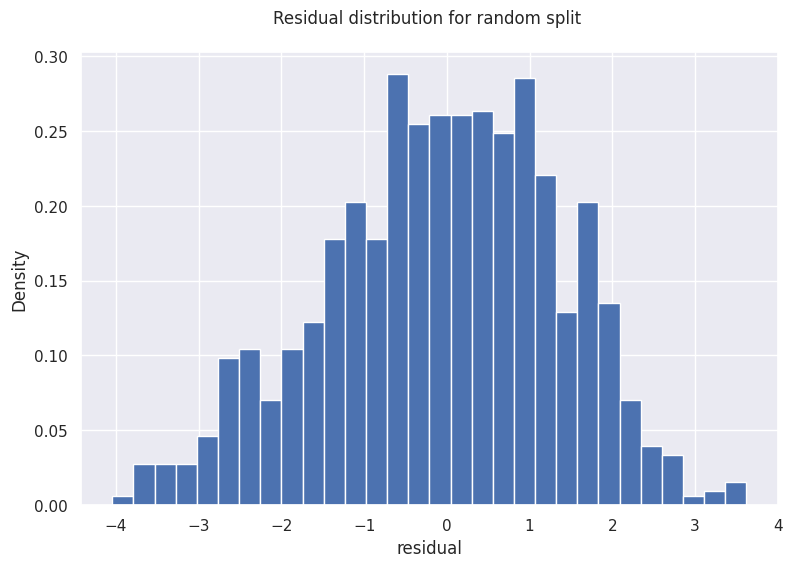

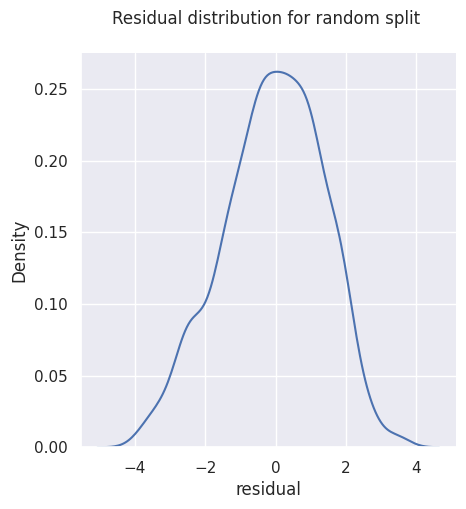

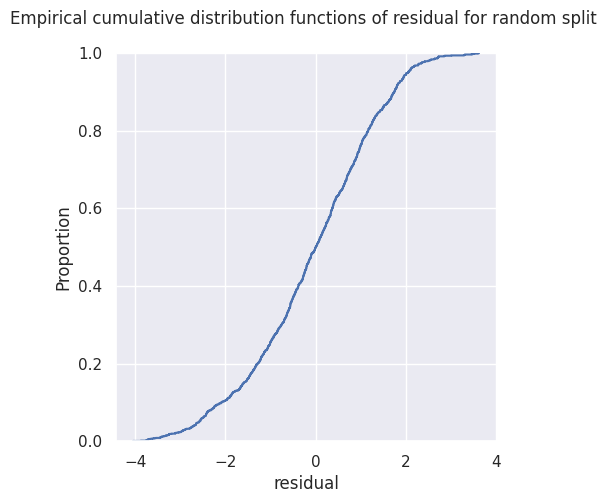

In [18]:
residual = y_test - pred_random
plt.hist(residual, bins = 30, density = True)
plt.title('Residual distribution for random split \n')
plt.xlabel('residual')
plt.ylabel('Density')
sns.displot(residual, kind="kde")
plt.xlabel('residual')
plt.title('Residual distribution for random split \n');
sns.displot(residual, kind="ecdf")
plt.xlabel('residual')
plt.title('Empirical cumulative distribution functions of residual for random split \n');
plt.show()

Using this distribution, estimate what is the probability that your prediction is off by more than 2-points? Provide bootstrapped confidence intervals for your answer.

In [19]:
prob_off = ((residual > 2).sum() + (residual < -2).sum()) / residual.count()
print('The probability that our prediction is off by more than 2 point is about {}%.'.format(round(prob_off * 100,3)))

The probability that our prediction is off by more than 2 point is about 15.975%.


In [20]:
def boostrap_CI(df, features, max_iter, drop_interval_size):
    '''
    Input : full dataset df , features used for regression , number of iteration max_iter
    Output : confidence intervals using the empirical distribution with [2.5%,97.5%] of data.
    '''
    y = df['ratings']
    X = df.drop('ratings',axis=1)
    X = X[features]
    ci = []
    for i in range(max_iter):
        X_train, X_test, y_train, y_test = split_data_randomly(X,y,test_size=.5,random_state=None)
        reg_random = linear_model.LinearRegression().fit(X_train,y_train)
        pred = reg_random.predict(X_test)

        residual = y_test - pred
        ci.append(((residual > 2).sum() + (residual < -2).sum()) / residual.count())
    
    confidence_interval = sorted(ci)
    
    return [confidence_interval[drop_interval_size],confidence_interval[-drop_interval_size]]

In [21]:
# we are using a 95% interval
max_iter = 1000
drop_interval_size = int(.025*max_iter) # 5%
ci = boostrap_CI(df, FEATURES, max_iter,drop_interval_size)
print('His corresponded bootstrapped confidence intervals is {}. '.format(ci))

His corresponded bootstrapped confidence intervals is [0.15037593984962405, 0.17387218045112782]. 


#### **1.3.4**
**Discuss:** Identify three additional features that are already computed in your dataframe and that could boost your model's predictive performance. You are not allowed to use the variable `decisions` as an input here. Before running any experiments, discuss why each of these features might add valuable information to your model.

The three features that we decide to use are:
1) Arxiv turn into boolean vs not boolean. This feature will be helpful because at the end we want to know if the Arxiv influences the decision. We have an hypothesis that posting to arxiv influences ratings, therefore it makes sense to include this as a predictive features.

2) Year as one hot encode. We saw with the longitudinal data it looks like there isn't as much predictivate power from year to year. So it would be a good feature to add robustness to our model. The assumptions relies on the assumption that the ratings of the paper depend on the year.

3) Reputation of first author. As the other's author influence the ratings, as well. We add the reputation of the first author in our model. Considering the main part of the research in a paper is carried out by the first author, we believe that his/her reputation has impact on the paper quality and then its rating. 

In [22]:
# first feature
one_hot = pd.get_dummies(df['arxiv'], prefix = 'arxiv')
df = df.join(one_hot)

In [23]:
# second feature
one_hot = pd.get_dummies(df['year'], prefix = 'year')
df = df.join(one_hot)

In [24]:
# third feature
df['reputation_one'] = df.apply(lambda x: np.log10(x['authors_citations'][0]
                                                   /x['authors_publications'][0] + 1), axis=1)

In [25]:
NEW_FEATURES = ['authors_hindex_median','authors_publications_median',
                'authors_citations_median','reputation','arxiv_False','arxiv_True',
                'year_2018', 'year_2019', 'year_2020', 'reputation_one']

In [26]:
y_test, pred, r2 = linear_regression(df, NEW_FEATURES)
print('With our new set of features, we obtain a R2 equal to {}.'.format(round(r2,3)))

With our new set of features, we obtain a R2 equal to 0.249.


We can then observe that by adding our new features the R2 found by linear regression grows from 0.087 to 0.217, which shows that our choice of feature helps have a better prediciton of our dataset. We can add that this result doesn't guarantee that all the new features add valuable information to our model. By example, one of this features could be really great and add a lot of information to our model, while the others don't. So without any other experiment we can only conculde that those features as a group add valuable information to our model.


### Task 1.4

Experiment with training a different regressor, a [Gradient Boosting Regressor](https://scikit-learn.org/stable/modules/ensemble.html?highlight=xgboost#gradient-boosting). This regressor is analogous to the Gradient Boosting Classifier that you have seen in class. This model performs extremely well for a variety of tasks and is often used in machine learning competitions for tabular data (e.g., on [Kaggle](www.kaggle.com)). You must:

1. Train a Gradient Boosting Regressor without specifying any parameters, e.g. `GradientBoostingRegressor().fit(X, y)`, and report its $R^2$ on the testing set. Your model should again use as features:
    - Median values for the number of author citations, publications and h-indexes as calculated in Task 1.1.1.
    - `reputation` of the last author, as calculated in Task 1.1.2.
2. Create an additional feature called $crazy$, which is derived as follows. If the score  of the paper, $ratings$, is bigger than 4.96, then $crazy = 9 - ratings$, otherwise, $crazy = - ratings$. Train a Gradient Boosting Regressor to predict paper scores using only $crazy$ as a feature. Additionally, train a Linear Regression model to predict paper scores using only $crazy$ as a feature. Report the $R^2$ in the testing set.
3. **Discuss:** Why does the Gradient Boosting Regressor perform so much better?

#### **1.4.1**

In [27]:
def gradient_boost_regression(df, features):
    '''
    Input: full dataset df , features used for regression
    Output: y_test of our test df, our prediction 'pred' and R2 score
    '''
    
    y = df['ratings']
    X = df.drop('ratings',axis=1)
    X = df[features]
    #splitting
    X_train, X_test, y_train, y_test = split_data_randomly(X,y,test_size = .3)
    
    #Gradient Boosting Regression
    reg_random = ensemble.GradientBoostingRegressor().fit(X_train,y_train)
    pred = reg_random.predict(X_test)
    r2 = metrics.r2_score(y_test,pred)
    
    return y_test, pred, r2

In [28]:
# Gradient Boosting Regression with FEATURES used in Task 1.3

y_test, pred, r2 = gradient_boost_regression(df, FEATURES)
print('R2 = ',r2)

R2 =  0.09820713945498505


Note that in Task 1.3 with the same feature we calculate a R2 of 0.087 for the linear regression.

#### **1.4.2**
Create an additional feature called $crazy$, which is derived as follows. If the score  of the paper, $ratings$, is bigger than 4.96, then $crazy = 9 - ratings$, otherwise, $crazy = - ratings$. Train a Gradient Boosting Regressor to predict paper scores using only $crazy$ as a feature. Additionally, train a Linear Regression model to predict paper scores using only $crazy$ as a feature. Report the $R^2$ in the testing set.


In [29]:
def crazy_feature(x):
    '''
    Input: a rating of an article 
    Output: the corresponding crazy score
    '''
    if x >4.96:
        crazy = 9 - x
    else:
        crazy = -x
    return crazy

In [30]:
# creation of the feature crazy

df['crazy'] = df['ratings'].apply(crazy_feature)

In [31]:
#Gradient Boosting Regression with only 'crazy' as a feature.

y_test, pred, r2 = gradient_boost_regression(df, ['crazy'])
print('R2 = ',r2)

R2 =  0.9999901793925464


In [32]:
# Linear regression with only 'crazy' as a feature.

y_test, pred, r2 = linear_regression(df, ['crazy'])
print('R2 = ',r2)

R2 =  0.4074877840519888


#### **1.4.3**
#### **Discussion:** 
**Why does the Gradient Boosting Regressor perform so much better?**

In task 1.4.2, we observe a R2 much better when we use the gradient boosting regression (R2=0.999) than the linear regression (R2=0.422). This can be explain because the gradient boosting regression is an boosting ensemble method. The ensemble method represents a ensemble of weak predictive models that we train and then combine their result to make a better learner. The boosting is a type of ensemble methods which trains the model sequentially on a multitude of step. At each step, we train a new learner that puts emphasis on the points that the previous learner got wrong. So it basically corrects the previous learner at every steps, while the linear Regression fits  directly a linear model without boosting it .


### Task 1.5

Complex models often have several hyper-parameters. 
To obtain the best results, it is common-place to use a cross-validation set-up in your training data to find the best hyper-parameters, and then use it for the test set.


1. Write modular code (i.e., a function) to divide your training data into $N$ folds and perform cross-validation.
2.  Experiment tuning two hyper-parameters of the Gradient Boosting Regressor: `n_estimators` and `learning_rate`.
For each possible combination of the two hyper-parameters (see below for the range of values that you should try for each hyper-parameter), train your model in a cross-validation setup with $N$=20. Report the mean $R^2$ along with the 90% CI for the 18 scenarios. Notice that you can calculate the 90% CI in a bootstrap-like fashion.
    - `n_estimators`$ \in  \{ 50, 75, 100, 150, 200, 250\}$
    - `learning_rate`$ \in  \{ 0.1, 0.05, 0.01\}$.
3. With the best hyper-parameters obtained, train your model with the entire training set and report the $R^2$ on the testing set.
4. **Discuss:** Why don't we tune the hyper-parameters in the testing set instead of doing cross-validation in the training set?

#### **1.5.1**


In [33]:
def build_N_fold(X,y, N_fold, seed = 1):
    '''
    Input: dataset X , prediction feature y , number of folds N_fold
    Output: table with all the index representing the N-folds
    '''
    N_fold_df = pd.DataFrame()
    np.random.seed(seed) # Initializing the random 
    permut = np.random.permutation(X.shape[0]) #  permutation of the indexes of the dataset
    # permute the data
    X = X.iloc[permut,:]
    y = y.iloc[permut]
    indices_N = np.split(permut[:N_fold*int(X.shape[0]/N_fold)],N_fold) # Split the dataset maximal part of the data set
    # divided by 20 into k mini dataset
    return pd.DataFrame(indices_N)

In [34]:
y = df['ratings']
X = df.drop('ratings',axis=1)
X = df[FEATURES]
X_train, X_test, y_train, y_test = split_data_randomly(X,y,test_size = .3, random_state = 1 )

In [35]:
N_fold_index_df = build_N_fold(X_train,y_train, N_fold=20, seed = 1)
N_fold_index_df.shape

(20, 148)

In [36]:
# example of three folds

N_fold_index_df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,138,139,140,141,142,143,144,145,146,147
0,445,2687,1541,521,367,713,2185,1156,282,558,...,1950,2085,1026,630,1947,2758,2234,1452,2622,1221
1,899,540,2829,2367,1077,707,1661,1145,2188,812,...,187,2755,2535,854,1892,825,616,1068,2087,2108
2,1408,2375,1828,2832,1539,260,2744,1551,2045,1861,...,123,2427,1307,1223,335,1534,1468,2286,2431,180


**The crossvalidation as well as the tuning of the two parameters are done in the next part using the sklearn function GridSearchCV. So in this part we just provide a unused example of a function that can be use to split the data set in N-folds as asked in the instructions and we move on the next part where we perform our crossvalidation.**

#### **1.5.2**
2.  Experiment tuning two hyper-parameters of the Gradient Boosting Regressor: `n_estimators` and `learning_rate`.
For each possible combination of the two hyper-parameters (see below for the range of values that you should try for each hyper-parameter), train your model in a cross-validation setup with $N$=20. Report the mean $R^2$ along with the 90% CI for the 18 scenarios. Notice that you can calculate the 90% CI in a bootstrap-like fashion.
    - `n_estimators`$ \in  \{ 50, 75, 100, 150, 200, 250\}$
    - `learning_rate`$ \in  \{ 0.1, 0.05, 0.01\}$.

In [37]:
# type of regressor
gb = ensemble.GradientBoostingRegressor()

# settings
parameters = {'n_estimators': [50, 75, 100, 150, 200, 250],
              'learning_rate': [.1, .05, .01]}
y = df['ratings']
X = df.drop('ratings',axis=1)
X = df[NEW_FEATURES]

# splitting the train and test dataset
X_train, X_test, y_train, y_test = split_data_randomly(X,y,test_size = .3, random_state = 1 )

# cross k validation using GridsearchCV
clf = model_selection.GridSearchCV(gb, parameters, cv = 20, scoring = 'r2')
clf.fit(X_train,y_train)
best_param = clf.best_params_

In [38]:
print('The best hyper parameters found with cross k validation with a k=20 are {}.'.format(best_param ))

The best hyper parameters found with cross k validation with a k=20 are {'learning_rate': 0.05, 'n_estimators': 75}.


In [39]:
result = pd.DataFrame(clf.cv_results_)

# extract all k=20 step
result = result.iloc[:,result.columns.str.contains('split')]
result.head(3)

,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,split10_test_score,split11_test_score,split12_test_score,split13_test_score,split14_test_score,split15_test_score,split16_test_score,split17_test_score,split18_test_score,split19_test_score
0,0.152867,0.063938,0.233416,0.245024,0.239435,0.154750,0.138310,0.169729,0.201655,0.213843,0.187842,0.129632,0.151683,0.182543,0.294712,0.263851,0.210849,0.152342,0.182686,0.163292
1,0.144272,0.054259,0.221291,0.233398,0.242631,0.131159,0.129076,0.162625,0.196270,0.210265,0.184023,0.133066,0.146648,0.186604,0.288792,0.270675,0.215074,0.170290,0.182610,0.161788
2,0.145552,0.039422,0.224672,0.220055,0.244264,0.118636,0.131257,0.167866,0.186122,0.212438,0.186029,0.134435,0.140254,0.187872,0.291584,0.280965,0.198927,0.171068,0.181970,0.154424


In [40]:
# construction of the confidence interval for each split

confidence_interval=[]
for i in range(result.shape[0]):
    ci = sorted(result.loc[i,:])
    confidence_interval.append([ci[1],ci[18]])

Report the mean  𝑅2  along with the 90% CI for the 18 scenarios. Notice that you can calculate the 90% CI in a bootstrap-like fashion.

In [41]:
R2_mean = result.mean(axis=1)
# number of scenario
scenarios = np.arange(18)

#printing result
for scenario in scenarios:
    print('Scenario {0} : The mean R2 is equal to {1} with a 90% CI equal to {2}. '.format(
        scenario,R2_mean[scenario],confidence_interval[scenario]))

Scenario 0 : The mean R2 is equal to 0.18662009095236845 with a 90% CI equal to [0.1296317121096332, 0.26385099309059057]. 
Scenario 1 : The mean R2 is equal to 0.18324077484466303 with a 90% CI equal to [0.12907579577628803, 0.2706745496144499]. 
Scenario 2 : The mean R2 is equal to 0.1808905320730001 with a 90% CI equal to [0.11863612313027716, 0.28096499046566303]. 
Scenario 3 : The mean R2 is equal to 0.17307413914251552 with a 90% CI equal to [0.10304014116006943, 0.2818365685907396]. 
Scenario 4 : The mean R2 is equal to 0.16186434579916043 with a 90% CI equal to [0.08428729536385171, 0.2711192752346443]. 
Scenario 5 : The mean R2 is equal to 0.15558881448606715 with a 90% CI equal to [0.06887235482531939, 0.27150770630922183]. 
Scenario 6 : The mean R2 is equal to 0.18525385598521027 with a 90% CI equal to [0.1314660361619645, 0.25771419174896115]. 
Scenario 7 : The mean R2 is equal to 0.18892828614478363 with a 90% CI equal to [0.12860969131682454, 0.2663456716263247]. 
Scenari

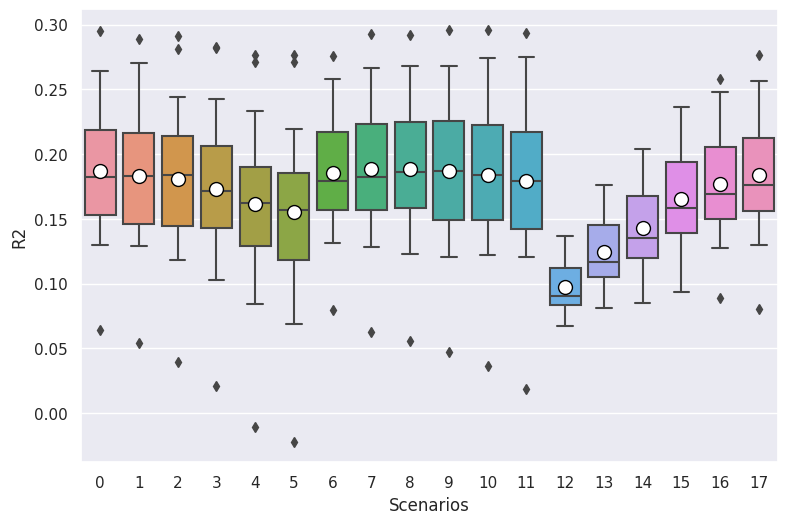

In [42]:
# plotting Warning the line represent the median the circle are the R2 mean of each scenario
plt.rcParams['figure.figsize'] = [9, 6]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 18}

plt.rc('font', **font)

sns.boxplot(data=result.T, showmeans=True, 
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"}, whis =.9)
plt.xlabel('Scenarios')
plt.ylabel('R2')
plt.show()

#### **1.5.3**
With the best hyper-parameters obtained, train your model with the entire training set and report the $R^2$ on the testing set.

In [43]:
# training the model for our best parameter
optimal_reg = ensemble.GradientBoostingRegressor(**best_param).fit(X_train,y_train)

In [44]:
# prediction and R2
pred = optimal_reg.predict(X_test)
r2 = metrics.r2_score(y_test,pred)
print('R2 on testing set = ',r2)

R2 on testing set =  0.24551369299533976


#### **1.5.4**
#### **Discussion:** 
**Why don't we tune the hyper-parameters in the testing set instead of doing cross-validation in the training set?**

To have a better representation of the reality, the hyper-parameters must be only train on the train set. If we train the hyper-parameters on the test set we can have a model perfectly representative of our test set but that behave poorly with other data. In order to avoid that, we used the cross  k  validation on the train test in order to get a good estimation of the true loss and the true accuracy of our model. The model is also much more robust to other data with same features.

## _Step 2:_ What influences papers getting accepted?

Time to change hats!

If before we were interested in creating an accurate regressor, now we are interested in understanding what increases the chance of papers getting accepted. 

Typically, in that scenario, simpler models with a clear statistical interpretation (e.g. logistic regression) yield more interesting insights.

For the analysis in this and the next step, you should use [statsmodels](https://www.statsmodels.org/) (for the regressions) and [scipy](https://www.scipy.org/) (for the statistical hypothesis testing).


### Task 2.1

Let's warm up with some visualizations and some hypothesis testing!

1. Plot the distributions of 1) ratings of papers that got accepted in 2020, 2) ratings of papers that got rejected in 2020.
2. Select a statistical test to compare whether the mean for ratings of papers that got accepted in 2020 is significantly higher.
3. **Discuss:** Justify why the statistical test you selected is appropriate. Interpret the test-related statistic and its p-value: concretely, what do they mean?

In [45]:
# Select the 2020 papers 
df_20 = df[df['year'] == 2020].copy()

In [46]:
df_20.reset_index(drop=True, inplace=True)

In [47]:
accept_2020 = df_20.loc[df_20['decisions'] == 'Accept'].ratings
reject_2020 = df_20.loc[df_20['decisions'] == 'Reject'].ratings

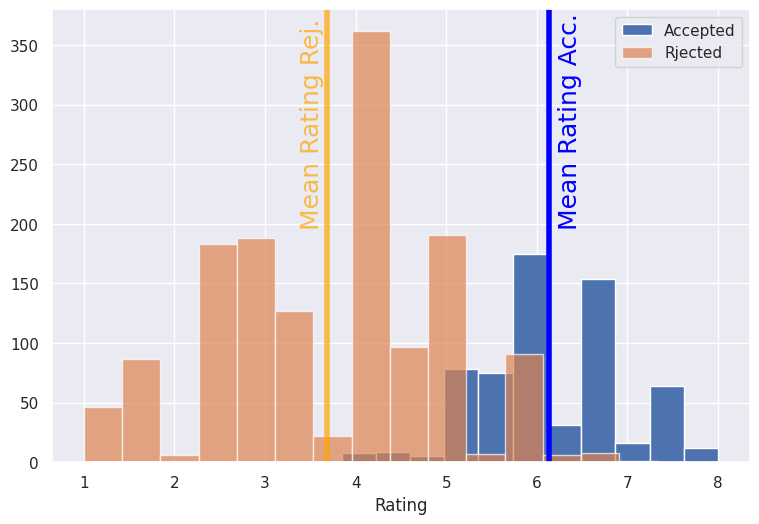

In [48]:
# plotting histogram of the ratings:
accept_2020.hist(bins = 15, alpha = 1.0, label = 'Accepted')
reject_2020.hist(bins = 15, alpha = 0.7, label = 'Rjected')
plt.legend()
plt.xlabel("Rating")
# calculating mean values:
accept_mean = accept_2020.mean()
reject_mean = reject_2020.mean()
# plotting the mean values on the histogram
plt.axvline(accept_mean, color = "blue", linewidth=4, alpha = 1.0)
plt.text(accept_mean+0.1, 200,
         'Mean Rating Acc.',rotation=90, color = "blue")
plt.axvline(reject_mean, color = "orange", linewidth=4, alpha = 0.7)
plt.text(reject_mean-0.3, 200,
         'Mean Rating Rej.',rotation=90, color = "orange", alpha = 0.7)
plt.show()

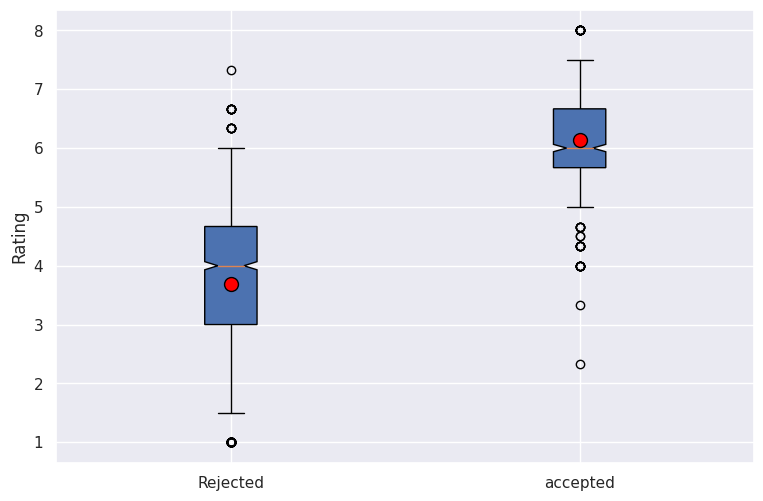

In [49]:
# Ploting boxplot of reject (control) and accept (treatment) groups 
plt.boxplot ([reject_2020, accept_2020],
            vert=True,  # vertical box alignment
            patch_artist=True,  # fill with color
            notch=True,
            labels=["Rejected", "accepted"],
            showmeans=True, 
            meanprops={"marker":"o",
                       "markerfacecolor":"Red", 
                       "markeredgecolor":"black",
                       "markersize":"10"}, whis =.95)
plt.ylabel("Rating")
plt.show()

In [50]:
# considering that the rating is a contineous varisble and the output is a Catagorical variable, the proper test is T_test:
# here we use Scipy to perform a T-test
scipy.stats.ttest_ind(accept_2020, reject_2020)

Ttest_indResult(statistic=45.77863502222979, pvalue=8.8884462e-316)

# Discussion
## T-test result discussion:
The two hypotheses for this particular two sample t-test are as follows:

H0: µ1 = µ2 (the two population means are equal)

HA: µ1 ≠µ2 (the two population means are not equal)

The calculated P-value P < 0.05:

considering that P-value is very small the HA is accepted in this case meaning that:
there is a  meaningful correlation between the acceptance of the papers and their ratings.

The value of the statistics itself which is a relatively large positive number shows that rating has a large 
positive influence on papers getting aceepted.

### Task 2.2

We will now carry out a logistic regression modeling the binary variable `decisions` as a function of the continuous variable `ratings` and an intercept. 

Recall that a logistic regression is a model in the form:

$$
\log \Big( \frac{p}{1-p} \Big) = b_0 + b_1x_1 + b_2x_2 + \ldots
$$

Where $p$ is the probability of the dependent variable (here, `decisions`) being equals to 1. 
Note that $\frac{p}{1-p}$ represents the odds of the variable, and thus, on the left-hand side we have the log-odds of the variable.
This can be also written as:

$$
\Big( \frac{p}{1-p} \Big) = e^{b_0 + b_1 x_1 + b_2 x_2 + \ldots} =  e^{b_0} e^{b_1 x_1} e^{b_2 x_2} \ldots
$$

Given a linear variable, say $x_1$, if we increase the value associated with this variable by a single unit, and keep everything constant, we have:

$$
 e^{b_1(x_1+1)} =  e^{b_1 x_1 + b_1} = e^{b_1 x_1}e^{b_1}  
$$

This means that we multiply the odds of the outcome variable by $e^{b_1}$. Thus, let's say that $x_1$ is the average rating, and $\beta_1$ is the associated coefficient. Also, let's assume that $\beta_1$ equals 2. In that case, increasing the score of the paper by 1 unit is equivalent to multiplying both sides of the previous equation by $e^{b_1}$. The original equation for our model becomes:

$$
\Big( \frac{p}{1-p} \Big) = e^{b_0} e^{b_1 x_1} 
$$
$$
\Big( \frac{p}{1-p} \Big) e^{b_1}  = e^{b_0} e^{b_1 x_1} e^{b_1}
$$

Since $b_1=2$, we have that this is the same as multiplying the odds of the variable by $e^2\approx7$. 
So for example, if a paper with a score 5 had $p=0.05$ of being approved, its odds would be $0.05/0.95\approx0.052$. According to our model, an increase in 1-rating point would mean that the new odds would be $0.052*7\approx0.36$. Using the odds formula  ($\frac{p}{1-p}$), this suggests that this paper would have a chance of $0.56$ of being accepted.

---

This is the theory. Now, let's find out what the real world looks like.


1. Fit a logistic regression model to our data considering as the training set all papers submitted in 2020. Your model should predict a binary variable related to decisions (which equals true if the paper was accepted and false otherwise) as a function of the paper ratings and an intercept. In mathematical notation:
$$
d = b_0 + r b_1
$$
Where $d$ is the binary variable corresponding to a decision, $r$ is a numeric variable corresponding to the rating a paper has received and $b$ are coefficients.
Notice that here we have no testing set!
Report the summary of your model. 
2. **Discuss:** Interpreting the coefficients of your model, calculate the probability that a paper with a score 7 will be accepted.


In [51]:
df_20['decisions'] = df_20['decisions'].apply(lambda x: 1 if x=="Accept" else 0)

In [52]:
X = df_20['ratings']
X = sm.add_constant(X)
X.reset_index(drop=True,inplace=True)

y = df_20['decisions']
y.reset_index(drop=True,inplace=True)

In [53]:
# Fitting a logistic regression on the X and y:
logit_model = sm.Logit(y, X).fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.252004
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              decisions   No. Observations:                 2051
Model:                          Logit   Df Residuals:                     2049
Method:                           MLE   Df Model:                            1
Date:                Thu, 19 Nov 2020   Pseudo R-squ.:                  0.5912
Time:                        19:54:01   Log-Likelihood:                -516.86
converged:                       True   LL-Null:                       -1264.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -12.8810      0.597    -21.573      0.000     -14.051     -11.711
ratings        2.3672      0.110     21.437      0.000       2.151       2.584
==============================================================================
"""

# Discussion:
1. The coeff of the fit for the const is -12.88 with a p-value of 0.0. This means that the chance of a paper with rank equal to zero  is 2.54-06 to get accpted. 

2. The coeff if ratings in the logit fit is 2.36 with a negligible P-value. This expresses that the chance of a paper getting accepted increase with rating increment. for example chance of a paper with rank 2.0 is 2.9e-04 and with rank 5.0 is 0.54 to get accpted.

3. The small P-value show that these realtion are strongly meaningful.

4. R-square is realtively high suggesting that a considrable amount og variation of the output is explained by input variance

In [54]:
# The logit regression does a linear regression on odds, which results in having a logistic regression on the probability
# feeding the variable rating into the line function that the logit regression fits gives us the odds of the output being True
# However, the logit model makes life easy for us and its predict function gives us the probability of giving True as output given  a certain rating

print(f"{logit_model.predict([1, 0])=}")
print(f"{logit_model.predict([1, 2])=}")
print(f"{logit_model.predict([1, 5])=}")
print(f"{logit_model.predict([1, 7])=}")

logit_model.predict([1, 0])=array([2.5460459e-06])
logit_model.predict([1, 2])=array([0.00028965])
logit_model.predict([1, 5])=array([0.26019392])
logit_model.predict([1, 7])=array([0.97562312])


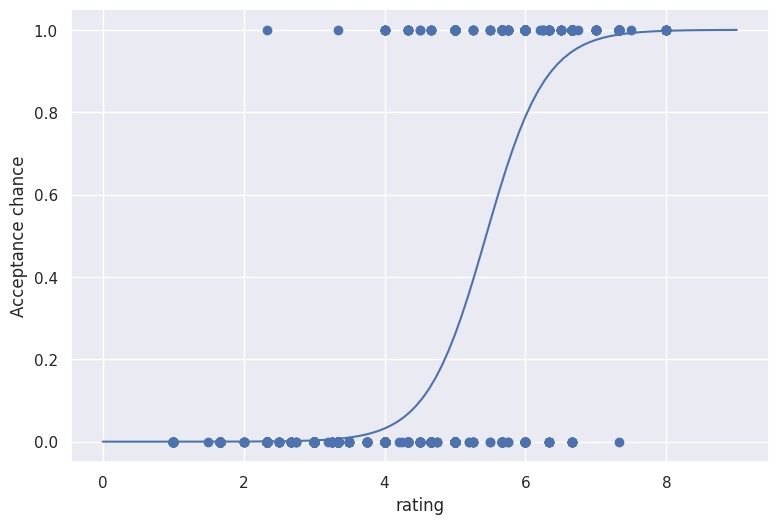

In [55]:
ratings = np.linspace(0, 9, 100, endpoint=True)
chance = np.zeros(ratings.size)
for i, rate in enumerate(ratings):
    chance[i] = logit_model.predict([1, rate])[0]
plt.plot(ratings, chance)
plt.xlabel("rating")
plt.ylabel("Acceptance chance")
plt.scatter(X.ratings, y)

## 2.2.2
#### The chance of a paper with rating 7.0 to get accepted is 0.9756 (vey high)

### Task 2.3

Our model is not so interesting since the only independent variable (that is, our model' feature or predictor) is something blatantly associated with paper acceptance. Let's go further! 

1. Run a logistic regression with the binary decision as the dependent variable (the outcome) and using as independent variables (the features): ratings, the reputation of the last author, and whether the paper was on arxiv or not. That is, in [patsy-style formula](https://patsy.readthedocs.io/en/latest/formulas.html): `decisions ~ ratings + reputation + arxiv` (variable names do not need to be exactly these). Consider all papers submitted in 2020 as your training data.
Notice that reputation was calculated in Task 1.1. 
2. **Discuss:** Unlike `ratings` and `reputation`, the variable `arxiv` is binary. Following the same logic as we did for continuous variables in the text of Task 2.2, interpret the meaning of this coefficient. What happens to the odds ratio if the paper was seen in arxiv? Is this effect statistically significant?

In [56]:
df_20.insert(loc=0, column="const", value =1.0)

In [57]:
formula = 'decisions ~ ratings + reputation + C(arxiv_True)'
logit_model_2 = sm.Logit.from_formula(formula, data = df_20).fit()
logit_model_2.summary()

Optimization terminated successfully.
         Current function value: 0.250562
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              decisions   No. Observations:                 2051
Model:                          Logit   Df Residuals:                     2047
Method:                           MLE   Df Model:                            3
Date:                Thu, 19 Nov 2020   Pseudo R-squ.:                  0.5935
Time:                        19:54:01   Log-Likelihood:                -513.90
converged:                       True   LL-Null:                       -1264.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -13.2259      0.634    -20.872      0.000     -14.468     -11.984
C(arxiv_True)[T.1]     0.2890      0.167      1.727      0.084      -0.039       0.617
ratings                2.3541      0.111     21.296      0.000       2.137       2.571
reputation             0.2267      0.148      1.533      0.125      -0.063       0.517
======================================================================================
"""

# Discussion:

The odd ratio of getting accepted increases roughly by 0.2890 if the paper is pre-printed in arxiv before submitting. However, the P-value is not less than 0.05 which means that this increase of accepting odd ratio is not guranteed by being pre-printed.

For instance, in the below figure chance of a paper for getting accepted is plotted considering that if it is pre-printed in arXiv or not:

In [58]:
def prob_calc(odd):
    return ((np.exp(odd))/
            (np.exp(odd)+1.0))

In [59]:
pre_chance = np.zeros(ratings.size)
non_pre_chance = np.zeros(ratings.size)
rep = 2.0
for i, rate in enumerate(ratings):
    odd_pre = logit_model_2.params[0] + logit_model_2.params[1] + logit_model_2.params[2] * rate + logit_model_2.params[3] * rep
    pre_chance[i] = prob_calc(odd_pre)
    odd_non_pre = logit_model_2.params[0] + logit_model_2.params[2] * rate + logit_model_2.params[3] * rep
    non_pre_chance[i] = prob_calc(odd_non_pre)
    #pre_chance[i] = logit_model_2.predict(1, rate, 1.2).shape
    #non_pre_chance[i] = logit_model_2.predict(0, rate, 1.2)

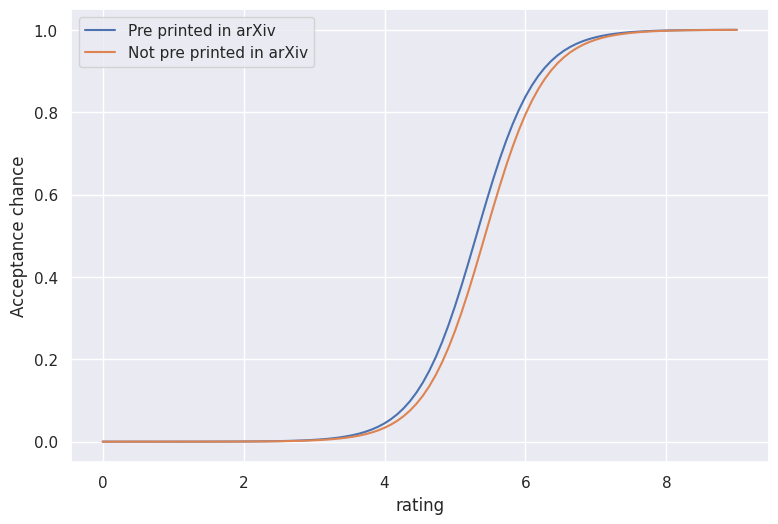

In [60]:
plt.plot(ratings, pre_chance, label='Pre printed in arXiv')
plt.plot(ratings, non_pre_chance, label='Not pre printed in arXiv')
plt.xlabel("rating")
plt.ylabel("Acceptance chance")
plt.legend()

### Task 2.4

Let's finally move on to the question that you have been dying to answer: Do pre-prints favor top institutions? 

In order to (try to) answer that question, you must fit yet another logistic regression.

Your regression should have the paper decision as the dependent variable, and `ratings`, `reputation`, and `arxiv` as independent variables just like in task 2.3. Yet, here, include also as independent variables the binary variable `has_top_institution`, which equals 1 if the paper has an author in a top-10 institution; and the interaction variable `arxiv:has_top_institution`, which equals one only if the paper is from a top-10 institution **and** if it appeared on arxiv before the submission deadline. In patsy-style formula your model should look something like: 

`decisions_bool ~ ratings + reputation + arxiv + has_top_institution + arxiv:has_top_institution`


1. Fit this model and estimate the effect of posting on arxiv for a top institution. Again, consider only papers submitted in the 2020 edition.
2. **Discuss:** Interpreting the p-values, discuss: is this evidence that arxiv breaks double-blind submissions?

In [61]:
formula = 'decisions ~ ratings + reputation + C(arxiv_True) + C(has_top_institution) + arxiv_True:has_top_institution'
logit_model_3 = sm.Logit.from_formula(formula,data = df_20).fit()

Optimization terminated successfully.
         Current function value: 0.247440
         Iterations 8


In [62]:
logit_model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              decisions   No. Observations:                 2051
Model:                          Logit   Df Residuals:                     2045
Method:                           MLE   Df Model:                            5
Date:                Thu, 19 Nov 2020   Pseudo R-squ.:                  0.5986
Time:                        19:54:01   Log-Likelihood:                -507.50
converged:                       True   LL-Null:                       -1264.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                        -13.3938      0.647    -20.716      0.000     -14.661     -12.127
C(arxiv_True)[T.1]                 0.1061      0.200      0.529      0.597      -0.287       0.499
C(has_top_institution)[T.1]        0.3662      0.224      1.631      0.103      -0.074       0.806
ratings                            2.3834      0.113     21.170      0.000       2.163       2.604
reputation                         0.1605      0.150      1.072      0.284      -0.133       0.454
arxiv_True:has_top_institution     0.5793      0.370      1.568      0.117      -0.145       1.304
==================================================================================================
"""

# Discussion

1. P-value for "has_top_instituation" and "arXiv:has_top_institution" is greater than 0.05 which means that we can neither conclude that being from top institution gurantees higher acceptance chance

2. P-value also for "arXiv:has_top_institution" is greater than 0.05 which means that being from top instution does not gurannte higher acceptance chance

3. The coeff of the variable "arXiv:has_top_institution" is greater than that of "has_top_instituation" which means that it is possible that pre-printing a paper can probably help a paper to benefit from its authors' institution rank. However its high P-value suggests that it is not for certain.

## Step 3: Matching

Okay, so let's change hats one last time.

As you have all seen in class, a particularly powerful way of disentangling causal effects from observational data is through matching: making sure we are not comparing apples to oranges.


### Task 3.1

One of the ways to do matching is called "Propensity Score Matching." There, we calculate a *propensity score* for each subject which represents the propensity to receive a "treatment." Then, we match subjects who received and did not receive the treatment, but that had similar propensity scores (that is, even though some received the treatment and some did not, they had similar chances to receive it).

In our specific case, we can further attempt to study the impact of pre-prints by considering publishing to arxiv as our "treatment".

In that context, the first step to perform propensity score matching is to create a classifier that predicts whether a paper was published on arxiv or not.

1. We have trained this classifier for you (don't get spoiled!). You may load the pandas dataframe entitled `propensity_scores.csv.gz` from the github repo. 
Notice that we will be using only the articles published in 2020. 
Create a new dataframe that is a merged version of this new dataframe with the dataframe you have been working on so far. Remember to keep only the papers published in 2020!
2. **Discuss:** In which way is this classifier (that is a classifier trained to estimate propensity scores) different from the previous classifier that you trained in Step 1?

**Hint:** For a classifier tra we don't need a training set and a test set!


In [63]:
PROP_PATH = './Data/propensity_scores.csv.gz'
propensity_df = pd.read_csv(PROP_PATH, compression = 'gzip')

FileNotFoundError: [Errno 2] No such file or directory: './Data/propensity_scores.csv.gz'

In [ ]:
prop_20 = df_20.merge(propensity_df, on = 'paper')

### Task 3.2

Now is time to match users! You will be implementing a technique called *caliper matching*. 

Create pairs of users as follows. For each treated subject (here a paper that was submitted to arxiv), find a non-treated subject (a paper that was not submitted to arxiv) with similar propensity score. Namely, if the propensity score of the treated unit is $p_t$, you must find a non-treated unit $p_c$ with propensity score $|p_{c} - p_t| < \epsilon$. If there is no such a non-treated unit, you may ignore the treated unit and move forward with the matching. Notice that your output must be a 1-to-1 matching. So each paper can only be matched once.

1. Perform this matching procedure using $\epsilon = 0.05$.
2. Report how many pairs did you manage to match? How many didn't you?

In [ ]:
prop_20_not['propensity_score'].describe()

In [ ]:
prop_20_arxiv = prop_20[prop_20['arxiv_True'] == 1] 
prop_20_not = prop_20[prop_20['arxiv_True'] == 0]

In [ ]:
B = nx.Graph()
B.add_nodes_from(list(prop_20_arxiv.index), bipartite = 0)
B.add_nodes_from(list(prop_20_not.index), bipartite = 1)

In [ ]:
graph_arxiv = prop_20_arxiv['propensity_score'].to_dict()
graph_not = prop_20_not['propensity_score'].to_dict()

In [ ]:
E = .05
for key,value in graph_arxiv.items():
    for key_2,value_2 in graph_not.items():
        if np.abs(value-value_2) <= E:
            B.add_edge(key, key_2, weight = np.abs(value-value_2))

In [ ]:
bipartite.is_bipartite(B)

In [ ]:
for line in bipartite.generate_edgelist(B):
    print(line)
    break

In [ ]:
len(prop_20_arxiv)

In [ ]:
matches = bipartite.minimum_weight_full_matching(B,list(prop_20_arxiv.index))

In [ ]:
prop_20_matched = prop_20_arxiv.copy()

In [ ]:
prop_20_matched['match'] = prop_20_arxiv.index.map(matches)

In [ ]:
prop_20_matched = prop_20_matched.merge(prop_20_not, right_index = True, left_on = 'match', suffixes = ['_treat','_not'])

### Task 3.3

Let's evaluate your matching! There are more rigorous ways to do it, but we'll go the easy path.


1. Using one or several appropriate plot types, visualize the distributions of the variables reputation and ratings, for treated and non-treated subjects that you matched.
2. Visualize the distributions of these variables for all papers from 2020 that appeared on arxiv, and all papers that did not (including those you did not manage to match).
3. **Discuss:** According to your visual analysis (no statistical tests needed here), did the matching do a good job at balancing covariates?

In [ ]:
fig, axs = plt.subplots(1,figsize=(10, 3), sharex = True, sharey = True)
axs.scatter(prop_20_matched['ratings_treat'],prop_20_matched['ratings_not'])
plt.show()

In [ ]:
fig, axs = plt.subplots(1,figsize=(10, 3), sharex = True, sharey = True)
axs.scatter(prop_20_matched['reputation_treat'],prop_20_matched['reputation_not'])
plt.show()

In [ ]:
fig, axs = plt.subplots(3,1,figsize=(10, 3), sharex = True, sharey = True)
sns.boxplot(x = prop_20_matched['ratings_treat'], ax = axs[0])
sns.boxplot(x = prop_20_matched['ratings_not'], ax = axs[1])
sns.boxplot(x = prop_20_not['ratings'], ax = axs[2])
plt.tight_layout()
plt.show()

In [ ]:
fig, axs = plt.subplots(3,1,figsize=(10, 3), sharex = True, sharey = True)
sns.boxplot(x = prop_20_matched['reputation_treat'], ax = axs[0])
sns.boxplot(x = prop_20_matched['reputation_not'], ax = axs[1])
sns.boxplot(x = prop_20_not['reputation'], ax = axs[2])
plt.tight_layout()
plt.show()

In [ ]:
fig, axs = plt.subplots(1,3,figsize=(10, 3), sharex = True, sharey = True)
axs[0].hist(prop_20_matched['ratings_treat'], bins = 10, density = True)
axs[1].hist(prop_20_matched['ratings_not'], bins = 10, density = True)
axs[2].hist(prop_20_not['ratings'], bins = 10, density = True)
plt.show()

In [ ]:
fig, axs = plt.subplots(1,3,figsize=(10, 3), sharex = True, sharey = True)
axs[0].hist(prop_20_matched['reputation_treat'], bins = 15, density = True)
axs[1].hist(prop_20_matched['reputation_not'], bins = 15, density = True)
axs[2].hist(prop_20_not['reputation'], bins = 15, density = True)
plt.show()

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(10, 3), sharex = True, sharey = True)
axs[0].hist(prop_20_matched['ratings_treat'], bins = 15, density = True)
axs[1].hist(prop_20_not['ratings'], bins = 15, density = True)
plt.show()

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(10, 3), sharex = True, sharey = True)
axs[0].hist(prop_20_matched['reputation_treat'], bins = 15, density = True)
axs[1].hist(prop_20_not['reputation'], bins = 15, density = True)
plt.show()

### Task 3.4

Finally, it's time to estimate the treatment effect. Given that we have pairs of matched samples, one that received treatment and one that did not, and that they have associated outcomes $y_{treat}$ and $y_{\neg treat}$. We can calculate the average treatment effect as:

$$
ATE = \frac{1}{N} \sum_i^N  y_{treat}^{(i)} - y_{\neg treat}^{(i)}
$$

Notice that here the outcome is a simple binary variable which equals 1 if the paper has been accepted and equals 0 if the paper has been rejected, and $N$ is the total number of matched samples in our analysis.

According to your matched sample, estimate the treatment effect of publishing a paper on arxiv. Report the 95% CI through bootstrapping.


In [ ]:
import random

In [ ]:
iters = 1
ate = []
for i in range(iters):
    sample = prop_20_matched.sample(frac = 1, replace = False)
    ate.append(np.sum(sample['decisions_treat'] - sample['decisions_not'])/sample.shape[0])

In [ ]:
ate

In [ ]:
sum(sample['decisions_treat'] - sample['decisions_not'])

In [ ]:
sum(sample['decisions_treat'])

In [ ]:
sum(sample['decisions_not'])

In [ ]:
plt.hist(ate)
plt.show()

In [ ]:
sns.boxplot(x = ate)

### Task 3.5

Wait, but what about prestigious institutions? 

1.  To understand what is going on there, repeat tasks 3.2 to 3.4 considering *only* the top 10 institutions. Notice that you can use the same propensity scores and re-do the steps in a reduced dataframe containing only top-institutions.
2. **Discuss:** Is this evidence that arxiv breaks double-blind submissions?

In [ ]:
### Your code here! ###